In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
!nvidia-smi

Wed Apr 27 15:05:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [4]:
data.data.shape

(569, 30)

In [5]:
import pandas as pd
from sklearn import datasets
load_df = datasets.load_breast_cancer()

data = pd.DataFrame(load_df.data)
feature = pd.DataFrame(load_df.feature_names)
data.columns = feature[0]
target = pd.DataFrame(load_df.target)
target.columns=['target']
df = pd.concat([data, target], axis=1)
print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Image

import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-Learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as MSE

# Ensemble Learning
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [53]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_n = X.to_numpy()

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [55]:
from sklearn.neighbors import KNeighborsClassifier

# 5개 근접한 이웃, 거리측정기준 : 유클리드
knn = KNeighborsClassifier(n_neighbors=5, p=2)

# Model Fitting 과정
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print('Misclassified training samples : %d' % (y_train != y_train_pred).sum())
print('Misclassified test samples : %d' % (y_test != y_test_pred).sum())

Misclassified training samples : 26
Misclassified test samples : 9


In [58]:
CM_report=classification_report(y_test, y_test_pred)
print(CM_report)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        64
           1       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [59]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred))
print(cross_val_score(knn, X, y, cv=10).mean())

0.9473684210526315
0.9297619047619046


In [60]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_true = y_test, y_pred = y_test_pred)
print(conf)

[[ 57   7]
 [  2 105]]


In [61]:
train_acc = []
test_acc = []

for n in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append((prediction==y_test).mean())

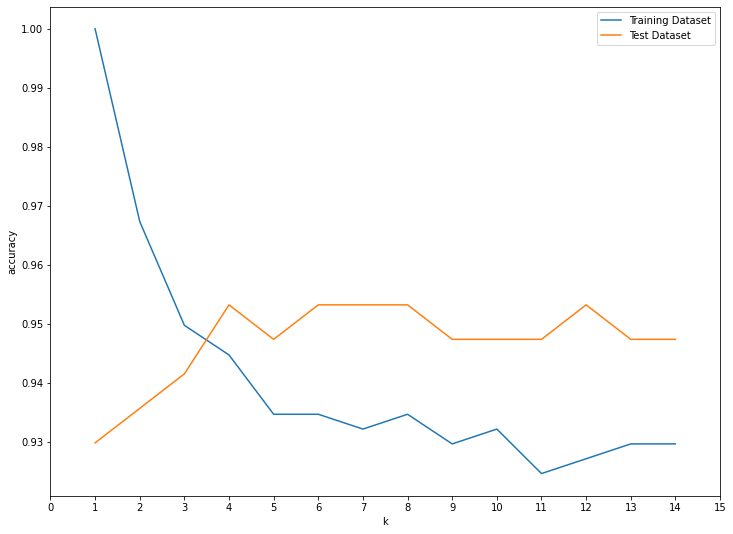

In [62]:
import numpy as np
plt.figure(figsize=(12, 9))
plt.plot(range(1, 15), train_acc, label='Training Dataset')
plt.plot(range(1, 15), test_acc, label='Test Dataset')
plt.xlabel("k")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 16, step=1))
plt.legend()

In [63]:
from sklearn.linear_model import LogisticRegression
Logit = LogisticRegression(C=1e2,
                          multi_class='ovr',
                          random_state=17,
                          max_iter=200
                          )

Logit.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=100.0, max_iter=200, multi_class='ovr', random_state=17)

In [64]:
y_train_pred = Logit.predict(X_train)
y_test_pred = Logit.predict(X_test)
y_test_pred_proba = Logit.predict_proba(X_test)
print(y_test_pred[:5])
print(y_test_pred_proba[:5])

[1 1 1 0 0]
[[2.45071521e-04 9.99754928e-01]
 [6.42142608e-05 9.99935786e-01]
 [1.75128360e-03 9.98248716e-01]
 [9.96480002e-01 3.51999824e-03]
 [1.00000000e+00 1.62910922e-21]]


In [65]:
# Accuracy Score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9623115577889447
0.9766081871345029


In [66]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[ 61   3]
 [  1 106]]


In [67]:
CM_report=classification_report(y_test, y_test_pred)
print(CM_report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        64
           1       0.97      0.99      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [68]:
##### 규제화 방법을 넣을 수도 있다.
from sklearn.linear_model import LogisticRegression

# C = 1 / λ

# L2
# L2 with C = 10
lr2_10 = LogisticRegression(penalty='l2', C=10.0)

# L2 with C = 1
lr2_1 = LogisticRegression(penalty='l2', C=1.0)

# L2 with C = 0.1
lr2_0_1 = LogisticRegression(penalty='l2', C=0.1)

# L1
# L1 with C = 10
lr1_10 = LogisticRegression(penalty='l1', C=10.0, solver='liblinear')

# L1 with C = 1
lr1_1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')

# L1 with C = 0.1
lr1_0_1 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')

In [69]:
lr2_10.fit(X_train, y_train)
print('Training accuracy with L2 and λ=10:', lr2_10.score(X_train, y_train))
print('Test accuracy with L2 and λ=10:', lr2_10.score(X_test, y_test))

Training accuracy with L2 and λ=10: 0.9547738693467337
Test accuracy with L2 and λ=10: 0.9473684210526315


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [70]:
lr2_1.fit(X_train, y_train)
print('Training accuracy with L2 and λ=1:', lr2_1.score(X_train, y_train))
print('Test accuracy with L2 and λ=1:', lr2_1.score(X_test, y_test))

Training accuracy with L2 and λ=1: 0.9472361809045227
Test accuracy with L2 and λ=1: 0.9532163742690059


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [71]:
lr2_0_1.fit(X_train, y_train)
print('Training accuracy with L2 and λ=0.1:', lr2_0_1.score(X_train, y_train))
print('Test accuracy with L2 and λ=0.1:', lr2_0_1.score(X_test, y_test))

Training accuracy with L2 and λ=0.1: 0.9296482412060302
Test accuracy with L2 and λ=0.1: 0.9649122807017544


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [72]:
lr1_10.fit(X_train, y_train)
print('Training accuracy with L1 and λ=10:', lr1_10.score(X_train, y_train))
print('Test accuracy with L1 and λ=10:', lr1_10.score(X_test, y_test))

Training accuracy with L1 and λ=10: 0.9748743718592965
Test accuracy with L1 and λ=10: 0.9707602339181286


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [73]:
lr1_1.fit(X_train, y_train)
print('Training accuracy with L1 and λ=1:', lr1_1.score(X_train, y_train))
print('Test accuracy with L1 and λ=1:', lr1_1.score(X_test, y_test))

Training accuracy with L1 and λ=1: 0.957286432160804
Test accuracy with L1 and λ=1: 0.9649122807017544


In [74]:
lr1_0_1.fit(X_train, y_train)
print('Training accuracy with L1 and λ=0.1:', lr1_0_1.score(X_train, y_train))
print('Test accuracy with L1 and λ=0.1:', lr1_0_1.score(X_test, y_test))

Training accuracy with L1 and λ=0.1: 0.9296482412060302
Test accuracy with L1 and λ=0.1: 0.9473684210526315


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [75]:
print(lr1_10.intercept_)

[19.77960582]


In [76]:
print(lr1_10.coef_)

[[ 1.14290835e+00  2.11981862e-01 -1.19434080e-01  6.29671666e-03
   0.00000000e+00  0.00000000e+00 -4.55191519e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  2.43923985e+00
  -1.77128279e-01 -1.37277781e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   5.01720765e-01 -5.72176296e-01  9.63556650e-03 -2.14344520e-02
  -1.61232832e+01  0.00000000e+00 -2.82321614e+00 -2.36053392e+01
  -3.75313536e+00  0.00000000e+00]]


In [77]:
from sklearn.tree import DecisionTreeClassifier

DT_MODEL= DecisionTreeClassifier(random_state=0) 
DT_MODEL.fit(X_train, y_train)

prediction=DT_MODEL.predict(X_test)

In [79]:
from sklearn.metrics import classification_report, confusion_matrix
CM=confusion_matrix(y_test, prediction)
CM_report=classification_report(y_test, prediction)
print(CM)

[[ 57   7]
 [  5 102]]


In [80]:
print(CM_report)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        64
           1       0.94      0.95      0.94       107

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



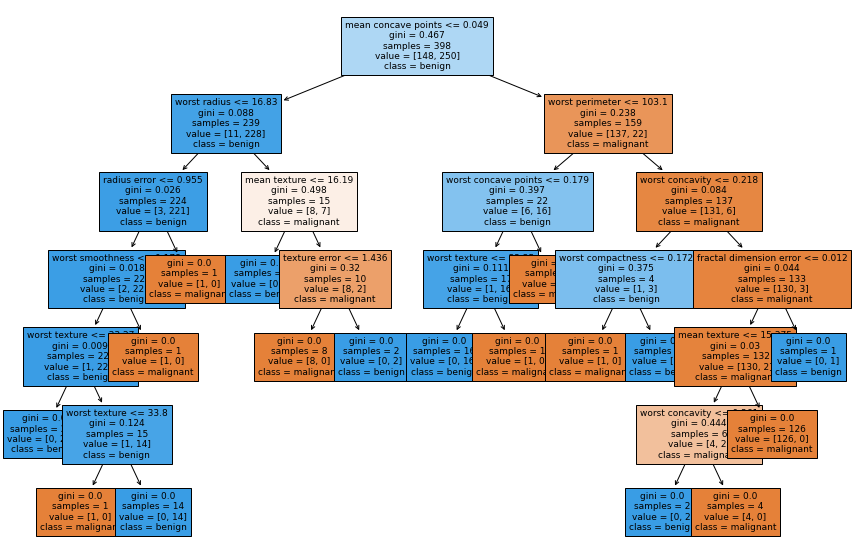

In [96]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(DT_MODEL, feature_names=load_df.feature_names, class_names=load_df.target_names, filled=True, fontsize=9)
plt.show()

--------------- Confusion Matrix ---------------
[[ 61   3]
 [  2 105]]
-------------------- 성능평가 --------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        64
           1       0.97      0.98      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



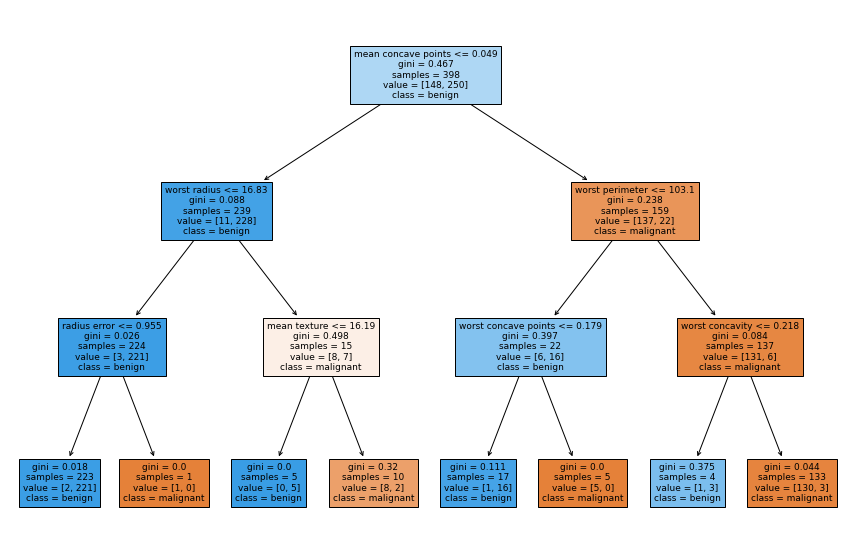

In [99]:
# 가지치기1 - Depth 설정

DT_MODEL_DEP3= DecisionTreeClassifier(max_depth=3, random_state=0) 
DT_MODEL_DEP3.fit(X_train, y_train)

prediction_DEP3=DT_MODEL_DEP3.predict(X_test)

CM_DEP3=confusion_matrix(y_test, prediction_DEP3)
CM_report_DEP3=classification_report(y_test, prediction_DEP3)

print('-'*15, 'Confusion Matrix','-'*15)
print(CM_DEP3)
print('-'*20, '성능평가','-'*20)
print(CM_report_DEP3)

plt.figure(figsize=(15,10))
plot_tree(DT_MODEL_DEP3, feature_names=load_df.feature_names, class_names=load_df.target_names, filled=True, fontsize=9)
plt.show()

--------------- Confusion Matrix ---------------
[[ 59   5]
 [  4 103]]
-------------------- 성능평가 --------------------
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        64
           1       0.95      0.96      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



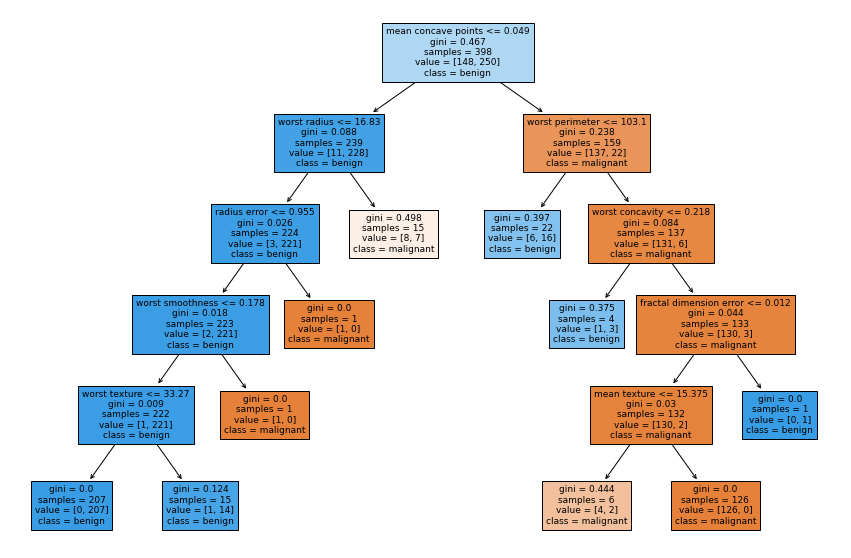

In [100]:
# 가지치기2 - 최소 샘플 개수 설정

DT_MODEL_MINSAM= DecisionTreeClassifier(min_samples_split=45, random_state=0) 
DT_MODEL_MINSAM.fit(X_train, y_train)

prediction_MINSAM=DT_MODEL_MINSAM.predict(X_test)

CM_MINSAM=confusion_matrix(y_test, prediction_MINSAM)
CM_report_MINSAM=classification_report(y_test, prediction_MINSAM)

print('-'*15, 'Confusion Matrix','-'*15)
print(CM_MINSAM)
print('-'*20, '성능평가','-'*20)
print(CM_report_MINSAM)

plt.figure(figsize=(15,10))
plot_tree(DT_MODEL_MINSAM, feature_names=load_df.feature_names, class_names=load_df.target_names, filled=True, fontsize=9)
plt.show()

mean radius : 0.000
mean texture : 0.025
mean perimeter : 0.000
mean area : 0.000
mean smoothness : 0.000
mean compactness : 0.000
mean concavity : 0.000
mean concave points : 0.749
mean symmetry : 0.000
mean fractal dimension : 0.000
radius error : 0.012
texture error : 0.000
perimeter error : 0.000
area error : 0.000
smoothness error : 0.000
compactness error : 0.000
concavity error : 0.000
concave points error : 0.000
symmetry error : 0.000
fractal dimension error : 0.000
worst radius : 0.045
worst texture : 0.000
worst perimeter : 0.104
worst area : 0.000
worst smoothness : 0.000
worst compactness : 0.000
worst concavity : 0.024
worst concave points : 0.040
worst symmetry : 0.000
worst fractal dimension : 0.000


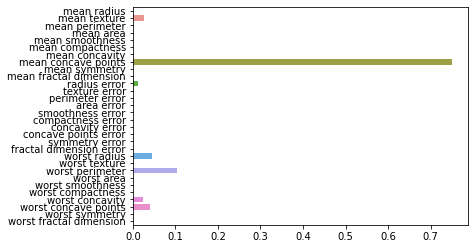

In [101]:
# 변수 중요도

for name, value in zip(load_df.feature_names , DT_MODEL_DEP3.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
# 변수 중요도 가시화    

import seaborn as sns
sns.barplot(x=DT_MODEL_DEP3.feature_importances_ , y=load_df.feature_names)